<strong>Tarea específica para realizar:
Conectarse a la API de XM, utilizando como fuente de información el siguiente enlace:
https://github.com/EquipoAnaliticaXM/API_XM
<br>

Obtener la generación real de la planta llamada aures bajo para el año 2023. Para lograr esto debe
seguir los siguientes pasos:</strong>

<strong>1. Obtener el código del recurso, si bien se proporcionó el nombre de la planta para poder
obtener la generación real de la misma se hace necesario obtener el código del recurso. En
el enlace proporcionado existe la información necesaria para consultar un endpoint
especifico que proporciona todos los nombres y códigos de los recursos disponibles en el
país. </strong>

In [2]:
import requests#Se importa la libreria requests para las peticiones
api_url_listado = "http://servapibi.xm.com.co/lists"#url para los listados
body_listado ={"MetricId": "ListadoAgentes"}#Listado de agentes
respuesta_listado = requests.post(api_url_listado, json=body_listado)
if respuesta_listado.status_code == 200:#Se corrobora que la respuesta es satisfactoria
    datos_respuesta_listado = respuesta_listado.json()
else:#De no ser satisfactoria la petición se muestra un mensaje de error
    print("Error. Codigo de estado:", respuesta_listado.status_code)
listadoAgentes=datos_respuesta_listado["Items"]#Se organiza el archivo JSON devuelto
actividad="GENERACIÓN"#Actividad de la empresa
planta="AURES BAJO S.A.S. E.S.P."#Nombre de la empresa
for i in range(len(listadoAgentes)):#Se itera sobre todos los agentes y si la actividad y el nombre coinciden entonces devuelve el codigo del agente
    datoAgente=listadoAgentes[i]["ListEntities"][0]["Values"]
    if datoAgente["Name"]==planta and datoAgente["Activity"]==actividad:
        codigo=datoAgente["Code"]
        break
print("El codigo para la planta ",planta," es: ",codigo)#Se muestra el codigo para mejor visualizacion

El codigo para la planta  AURES BAJO S.A.S. E.S.P.  es:  ABAG


<strong>2. Luego de obtener el recurso debe saberse que variable es la apropiada para consultar, de
manera similar existe un endpoint que proporciona la lista de variables disponibles para la
API de XM. Es incluso recomendable como primera acción consultar las variables
disponibles en la aplicación antes de iniciar con el punto 1.</strong>

In [6]:
ultimoDia=["31","28","31","30","31","30","31","31","30","31"]#Lista con los ultimos dias de cada mes hasta octubre
meses=["01","02","03","04","05","06","07","08","09","10"]#Lista con los numeros de los meses hasta octubre
generacionHora=[]#Lista vacia para guardar los datos de la generacion por hora de cada dia
api_url_generacion = "http://servapibi.xm.com.co/hourly"#url para la generacion horaria
for i in range(len(ultimoDia)):#Se itera sobre cada uno de los meses del anio hasta octubre
    dia=ultimoDia[i]
    mes=meses[i]
    body_generacion={"MetricId": "Gene",#Se filtra por el codigo anteriormente encontrado
        "StartDate":f"2023-{mes}-01",
        "EndDate":f"2023-{mes}-{dia}",
        "Entity": "Sistema",
        "Filter": [codigo]}

    respuesta_generacion = requests.post(api_url_generacion, json=body_generacion)
    if respuesta_generacion.status_code == 200:#Se corrobora que la respuesta es satisfactoria
        datos_respuesta_generacion=respuesta_generacion.json()
    else:
        print("Error. Codigo de estado:", respuesta_generacion.status_code)
    listadoGenearacion=datos_respuesta_generacion["Items"]
    for dato in listadoGenearacion:#Para cada uno de los datos solo se agregan las horas y la generacion dada en estas horas
       del dato["HourlyEntities"][0]["Values"]["code"]
       generacionHora.append(dato["HourlyEntities"][0]["Values"])#Se agregan las horas y la generacion a la lista

In [5]:
import pandas as pd#Se importa la libreria pandas para trabajar con dataframe y los diagramas
from datetime import date, timedelta#Se importa la libreria date para trabajar con horas
df = pd.DataFrame(generacionHora)
df = df.astype(float)
nuevas_columnas = ["H " + str(i) for i in range(1, len(df.columns) + 1)]
df.columns = nuevas_columnas
fecha_actual = date(2023, 1, 1)
fechas = [fecha_actual + timedelta(days=i) for i in range(len(generacionHora))]
df.index = fechas

In [7]:
df.head()#Se muestran las primeras 5 filas del dataframe para visualizar su estructura

,H 1,H 2,H 3,H 4,H 5,H 6,H 7,H 8,H 9,H 10,...,H 15,H 16,H 17,H 18,H 19,H 20,H 21,H 22,H 23,H 24
2023-01-01,7520571.56,7422464.39,7262440.87,7110737.81,6987142.16,6890653.34,6476679.99,6424557.32,6669773.39,7006507.35,...,7356609.33,7295393.40,7264573.44,7357688.83,8136774.52,8342401.68,8255970.10,8115596.95,7858107.21,7539203.63
2023-01-02,7294173.67,7078126.67,6948832.14,6852437.90,6767657.32,6875796.16,6986598.45,7421221.36,7832226.80,8354146.97,...,9265902.43,9109778.66,8975633.26,8852663.52,9661727.55,9778944.74,9579989.75,9236519.00,8757828.41,8335500.23
2023-01-03,7889876.30,7564507.82,7375070.31,7233144.87,7278149.47,7467231.03,7671076.45,8178158.16,8689006.92,8987130.20,...,9714334.89,9673382.44,9494537.67,9338801.07,9985070.97,10065971.01,9825824.09,9415188.53,8840891.60,8387773.51
2023-01-04,8035406.14,7814578.59,7599659.77,7509653.06,7579681.50,7786465.56,7892249.18,8391158.26,8926594.03,9215635.36,...,9959482.09,9897917.35,9662475.47,9523198.01,10117654.53,10257611.92,10018882.21,9605465.96,9058584.70,8570283.05
2023-01-05,8092949.11,7804670.16,7598793.92,7492787.52,7603079.23,7792522.24,7926988.88,8416244.49,8878635.67,9149724.48,...,9935414.32,9920843.78,9844420.62,9698774.20,10290672.55,10336303.86,10086319.46,9667967.37,9159154.59,8686554.42


In [15]:
df.to_excel("Generacion diaria.xlsx")#Si se desea crear un archivo en excel con los datos

<strong>3. Luego de obtener la generación real para el año 2023 se pide realizar un análisis estadístico
básico obtener las medidas básicas descriptivas de la generación: Media, mediana, max,
min, cuartiles.</strong>

In [26]:
media_total = df.mean().mean()#Se toma la media, mediana, maximo, minimo y los cuartiles del df en general
mediana_total = df.median().median()
maximo_total = df.values.max()
minimo_total = df.values.min()
cuartiles_total = df.stack().quantile([0.25, 0.5, 0.75])
print(f"Media total: {media_total}")
print(f"Mediana total: {mediana_total}")
print(f"Máximo total: {maximo_total}")
print(f"Mínimo total: {minimo_total}")
print("Cuartiles totales:")
print(cuartiles_total)

Media total: 9121160.241865942
Mediana total: 9671229.774999999
Máximo total: 11757378.78
Mínimo total: 6321567.61
Cuartiles totales:
0.25    8.095867e+06
0.50    9.197830e+06
0.75    1.016283e+07
dtype: float64


In [25]:
media_por_hora = df.mean()#Se toma la media, mediana, maximo, minimo y los cuartiles por cada columna (hora del dia)
mediana_por_hora = df.median()
maximo_por_hora = df.max()
minimo_por_hora = df.min()
cuartiles_por_hora = df.quantile([0.25, 0.5, 0.75])
print("Media por hora:")
print(media_por_hora)
print("\nMediana por hora:")
print(mediana_por_hora)
print("\nMáximo por hora:")
print(maximo_por_hora)
print("\nMínimo por hora:")
print(minimo_por_hora)
print("\nCuartiles por hora:")
print(cuartiles_por_hora)

Media por hora:
H 1     8.119308e+06
H 2     7.834618e+06
H 3     7.626625e+06
H 4     7.511442e+06
H 5     7.607061e+06
H 6     7.884280e+06
H 7     7.998120e+06
H 8     8.463859e+06
H 9     8.989887e+06
H 10    9.337756e+06
H 11    9.693509e+06
H 12    9.965034e+06
H 13    9.930284e+06
H 14    9.983397e+06
H 15    1.007189e+07
H 16    1.004577e+07
H 17    9.889164e+06
H 18    9.651329e+06
H 19    1.018029e+07
H 20    1.042345e+07
H 21    1.021073e+07
H 22    9.759517e+06
H 23    9.151297e+06
H 24    8.579232e+06
dtype: float64

Mediana por hora:
H 1     8.100604e+06
H 2     7.825125e+06
H 3     7.603023e+06
H 4     7.507211e+06
H 5     7.622442e+06
H 6     7.992950e+06
H 7     8.145804e+06
H 8     8.644212e+06
H 9     9.197648e+06
H 10    9.522811e+06
H 11    9.897056e+06
H 12    1.018072e+07
H 13    1.009599e+07
H 14    1.018014e+07
H 15    1.035144e+07
H 16    1.033128e+07
H 17    1.014521e+07
H 18    9.844842e+06
H 19    1.030021e+07
H 20    1.053762e+07
H 21    1.030987e+07
H 22 

<strong>4. Generar una gráfica que presente la generación de la planta y un diagrama de cajas y
bigotes de la misma.</strong>

Text(0, 0.5, 'Generacion diaria ')

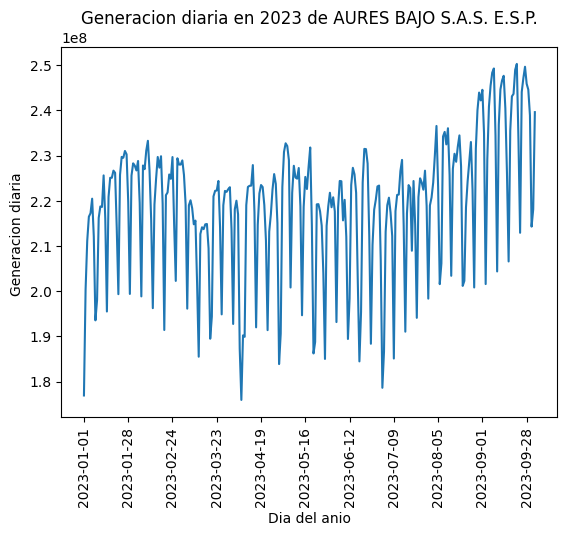

In [33]:
import matplotlib.pyplot as plt#Libreria matplotlib para los graficos
suma_por_dia = df.sum(axis=1)
plt.plot(df.index,suma_por_dia)#Se hace la grafica con la generacion diaria
fechas_a_mostrar = df.index[::len(df.index) // 10]
plt.xticks(fechas_a_mostrar, rotation=90)
plt.title("Generacion diaria en 2023 de AURES BAJO S.A.S. E.S.P.")
plt.xlabel("Dia del anio")
plt.ylabel("Generacion diaria ")

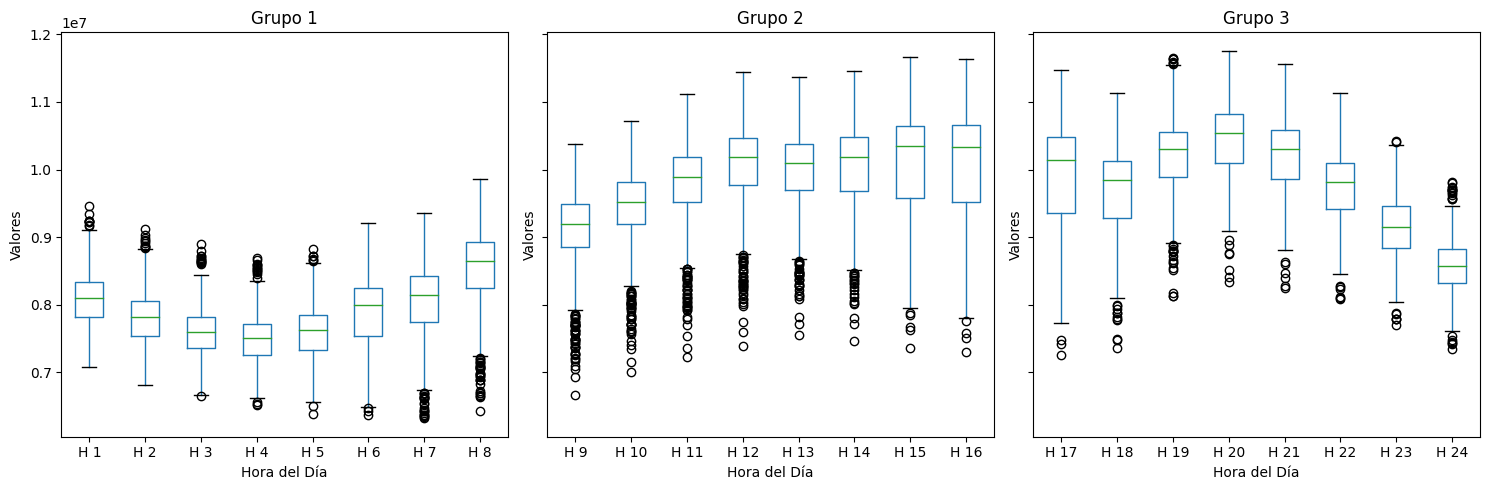

In [14]:
grupos_horas = [df.columns[i:i+8] for i in range(0, len(df.columns), 8)]#Se dividen los diagramas de caja en 3 subgrupos para mejor visualizacion
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
for i, grupo in enumerate(grupos_horas):
    df[grupo].boxplot(grid=False, ax=axs[i])
    axs[i].set_title(f"Grupo {i + 1}")
    axs[i].set_xlabel("Hora del Día")
    axs[i].set_ylabel("Valores")
plt.tight_layout()
plt.show()
